

## **COMP8685 Deep Learning Coursework A1**


Individual (50% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ .

Fashion MNIST is a dataset of 60,000 28x28 images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

Name: Napatchol Thaipanich (nt375)

Student ID: 25021661

In [1]:
# Import libraries
# from tensorflow.keras import Sequential, layers, regularizers, Input, utils
from tensorflow.keras import Sequential, layers, regularizers, Input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import random

# Setup variables for split train-test, network, and training
"""
An "epoch" refers to one complete pass of the entire training dataset through a learning algorithm
i.e., if setting epoch to 20, it means the program will have 20 complete passes for the dataset
"""
N_EPOCH = 20 # initially set at 20
"""
BATCH_SIZE is the number of training examples used in a single iteration of the model training process
step per epoch = total training samples / batch size
"""
BATCH_SIZE = 16
"""
a flag to set the training procgress for each epoch;
verbose=0 is silent
verbose=1 shows progress bar
verbose=2 just mention the number of epoch
"""
VERBOSE = 1
N_CLASSES = 10 # number of output units that represent the number of classes/ categories (int)
N_HIDDEN = 128 # number of neurons in the hidden layer
VALIDATION_SPLIT=0.2 # proportion of the dataset used for validation, with the remaining .8 for training
"""
60% of neurons will be randomly dropped (disabled) during training.
Conversely, only 40% of neurons will remain active in each forward pass.
It is used to prevent extreme overfitting.
"""
P_DROPOUT = 0.6
K = 5 # the number of fold that will be used in the split way
"""
The original dataset image size is still 28 x 28, but we need to assign color channels for them.

reshape image to 28 x 28 x 1 in 4D format
(num_samples, height, width, channels)
channel = 1 for gray channel, 3 for RGB channel
num_samples = -1, keeps the number of samples unchanged

It should be applied and reshaped because of using CNNs (expecting 4D input, but data is in 2D/3D)
"""
RESHAPED = (-1, 28, 28, 1)

Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [2]:
# load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# this below is for comparing 2 loss functions, "sparse_categorical_crossentropy" and "categorical_crossentropy"
# (x_train, output_y_train), (x_test, output_y_test) = fashion_mnist.load_data()
# print the shapes of the training and testing datasets

print("Original shape")
print(f"Training Set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test Set: {x_test.shape}, Labels: {y_test.shape}")
# print(f"Training Set: {x_train.shape}, Labels: {output_y_train.shape}")
# print(f"Test Set: {x_test.shape}, Labels: {output_y_test.shape}")

# reshape for CNN training
x_train = x_train.reshape(RESHAPED)
x_test = x_test.reshape(RESHAPED)

"""
normalize image to the pixel form, which is 0 and 1

the purpose of normalizing is
- Normalizing to [0,1] keeps weights balanced and learning smooth
- Normalized inputs allow faster weight updates
- ensuring they are the same scale
"""
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# this below is for comparing 2 loss functions
# y_train = utils.to_categorical(output_y_train, N_CLASSES)
# y_test = utils.to_categorical(output_y_test, N_CLASSES)

print("\nNew shape")
print(f"Training Set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test Set: {x_test.shape}, Labels: {y_test.shape}")

# set up k-fold cross-validation
kf = KFold(n_splits=K, shuffle=True, random_state=42)
folds = list(kf.split(x_train, y_train))

for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold+1}: Train size = {len(train_idx)}, Validation size = {len(val_idx)}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original shape
Training Set: (60000, 28, 28), Labels: (60000,)
Test Set: (10000, 28, 28), Labels: (10000,)

New shape
Training Set: (60000, 28, 28, 1), Labels: (60000,)
Test Set: (10000, 28, 28, 1), Labels: (10000,)
Fold 1: Train size = 48000, Validation size = 12000
Fold 2: Train size = 48000, Validation size = 12000
Fold 3: Train size = 48000, Validation size = 12000
Fold 4: Train size = 48000, Validation size = 12000
Fold 5: Train size = 48000, Validation size = 12000


Visualise a random sample image of the dataset. **(5 marks)**

---



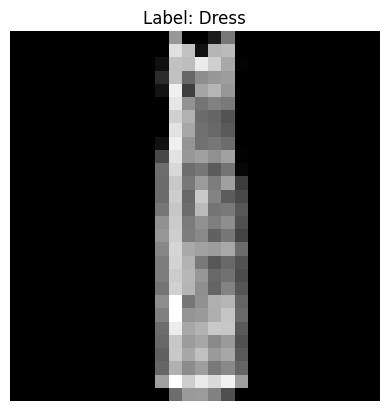

In [16]:
# visualisation random images

# select a random index from the training set
random_idx = random.randint(0, len(x_train) - 1)  # Pick a valid index
random_img = x_train[random_idx]  # Select the image
random_lab = y_train[random_idx]  # Select the corresponding label
# random_lab = output_y_train[random_idx] # Select the
# print(y_train[random_idx])
# mapping label with descriptions manually
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# plot the image
plt.imshow(random_img.squeeze(), cmap="gray")  # Remove extra dimension
plt.title(f"Label: {fashion_mnist_labels[random_lab]}")  # Display class label
plt.axis("off")
plt.show()

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [4]:
def create_model():
    """
    - Regularizers
    Feature Selection: use only L1, for remove unnecessary features, more
    Preventing Overfitting: use only L2
    Balance between feature extraction and model complexity: use L1L2

    - Activation function
    ReLU (Rectified Linear Unit): fast, prevent the vanishing gradient,
    """
    model = Sequential([
        # input node setting by using the shape of dataset which already reshaped
        Input(shape=RESHAPED[1:]),
        # First Convolutional Layer: edge
        layers.Conv2D(64,  # 64 filters
                  (3,3), # 3x3 kernel size
                  strides=(1,1), # Moves 1 pixel at a time in both horizontal & vertical directions
                  padding='same', # output size remains the same as the input
                  activation='relu', # ReLU activation, to introduce non-linearity, improving feature extraction.
                  kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), # Applies L1 (sparsity) and L2 (weight decay) regularization to prevent overfitting.
                  bias_regularizer=regularizers.L1(1e-5), # Regularizes the bias to avoid excessive bias values.
                  activity_regularizer=regularizers.L2(1e-4)), # Regularizes the output values of neurons, preventing extensive activations.
        layers.BatchNormalization(), # Batch normalization to stabilize and speed up training.
        layers.MaxPooling2D((2,2)), # Max pooling layer to downsample feature maps and reduce computation.

        # Second convolutional layer: textures
        layers.Conv2D(N_HIDDEN, # N_HIDDEN filters
                      (3,3), # 3x3 kernel size
                      strides=(1,1), # Moves 1 pixel at a time in both horizontal & vertical directions
                      padding='same', # output size remains the same as the input
                      activation='relu', # ReLU activation, to introduce non-linearity, improving feature extraction.
                      kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), # Applies L1 (sparsity) and L2 (weight decay) regularization to prevent overfitting.
                      bias_regularizer=regularizers.L1(1e-5), # Regularizes the bias to avoid excessive bias values.
                      activity_regularizer=regularizers.L2(1e-4)), # Regularizes the output values of neurons, preventing extensive activations.
        layers.BatchNormalization(), # Batch normalization to stabilize and speed up training.
        layers.MaxPooling2D((2,2)), # Max pooling layer to downsample feature maps and reduce computation.

        # Flattens the feature map into a 1D array before passing to dense layers.
        layers.Flatten(),

        # Fully connected layer with N_HIDDEN neurons for classification.
        layers.Dense(N_HIDDEN, # N_HIDDEN filters
                    activation='relu', # ReLU activation, to introduce non-linearity, improving feature extraction.
                    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), # Applies L1 (sparsity) and L2 (weight decay) regularization to prevent overfitting.
                    bias_regularizer=regularizers.L1(1e-5), # Regularizes the bias to avoid excessive bias values.
                    activity_regularizer=regularizers.L2(1e-4)), # Regularizes the output values of neurons, preventing extensive activations.

        # Dropout layer to randomly deactivate neurons and reduce overfitting.
        layers.Dropout(P_DROPOUT),

        # Final output layer with N_CLASSES neurons for multi-class classification.
        layers.Dense(
            N_CLASSES,
            activation='softmax' # softmax for Multi-class classification will Convert the outputs into probabilities, ensuring they sum to 1.,
        )
    ])


    """
    Adaptive Moment Estimation Optimizer, an advanced version of SGD (Stochastic Gradient Descent), adapted with first-order and second-order moments.
    ExponentialDecay, applied for smooth decay, prevents overfitting and Speeds Up Convergence.
    """
    OPTIMIZER = Adam(learning_rate=ExponentialDecay(
      initial_learning_rate=0.0005, # The starting learning rate for the optimizer.
      decay_steps=10000,  # After 10,000 steps, the learning rate will decay.
        decay_rate=0.98  # Learning rate will be multiplied by 0.98 (reduced by 2%) after each decay_steps.
        )
    )

    """
    chose appropriate loss function: sparse_categorical_crossentropy
    becuase it saves memory if compared to categorical_crossentropy with one-hot-encoding
    and the accuracy which showed in the additional questions is higher than categorical_crossentropy.
    """
    model.compile(optimizer=OPTIMIZER, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    # model.compile(optimizer=OPTIMIZER, loss="categorical_crossentropy", metrics=["accuracy"])

    return model

Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [13]:
histories = []
evaluate_histories = []
best_model = None
best_model_accuracy = 0.0

for fold, (train_idx, val_idx) in enumerate(folds):
  print(f"Training Fold {fold+1}/{K}")

  # Prepare training and validation sets for this fold
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # Create a new instance of the model for each fold
  model = create_model()

  # Train the model for N_EPOCH epochs on the current fold
  # validation date that using in the this line is test dataset for knowing the trend in the next task
  histories.append(model.fit(x_train_fold, y_train_fold, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), verbose=VERBOSE, validation_split=VALIDATION_SPLIT).history)

  # Evaluate the model on the current fold
  eval_result = model.evaluate(x_val_fold, y_val_fold, verbose=VERBOSE)
  evaluate_histories.append(eval_result)

  # Save the model with the highest accuracy in this fold
  if eval_result[1] > best_model_accuracy:
    best_model_accuracy = eval_result[1]
    best_model = model

Training Fold 1/5
Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7297 - loss: 1.3725 - val_accuracy: 0.8600 - val_loss: 0.6405
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8693 - loss: 0.6003 - val_accuracy: 0.8496 - val_loss: 0.5318
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8779 - loss: 0.4866 - val_accuracy: 0.8911 - val_loss: 0.4287
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8897 - loss: 0.4371 - val_accuracy: 0.8890 - val_loss: 0.4234
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8949 - loss: 0.4110 - val_accuracy: 0.8979 - val_loss: 0.3986
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8993 - loss: 0.3956 - val_accuracy: 0.8897 - val_loss: 0.4057
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9068 - loss: 0.3719 - val_accuracy: 0.8457 - val_loss: 0.5903
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [17]:
# Extract loss and accuracy from evaluate_histories
fold_accuracies = [eval_result[1] for eval_result in evaluate_histories]  # Accuracy is at index 1
fold_losses = [eval_result[0] for eval_result in evaluate_histories]  # Loss is at index 0

# Print accuracy & loss per fold
for i, (acc, loss) in enumerate(zip(fold_accuracies, fold_losses), 1):
    print(f"Fold {i}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Compute final cross-validation results
average_accuracy = np.mean(fold_accuracies)
average_loss = np.mean(fold_losses)

print("\nFinal Cross-Validation Results:")
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Loss: {average_loss:.4f}")

Fold 1: Accuracy = 0.9139, Loss = 0.3705
Fold 2: Accuracy = 0.9145, Loss = 0.3931
Fold 3: Accuracy = 0.9085, Loss = 0.4103
Fold 4: Accuracy = 0.9174, Loss = 0.4024
Fold 5: Accuracy = 0.9058, Loss = 0.4112

Final Cross-Validation Results:
Average Accuracy: 0.9120
Average Loss: 0.3975


Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

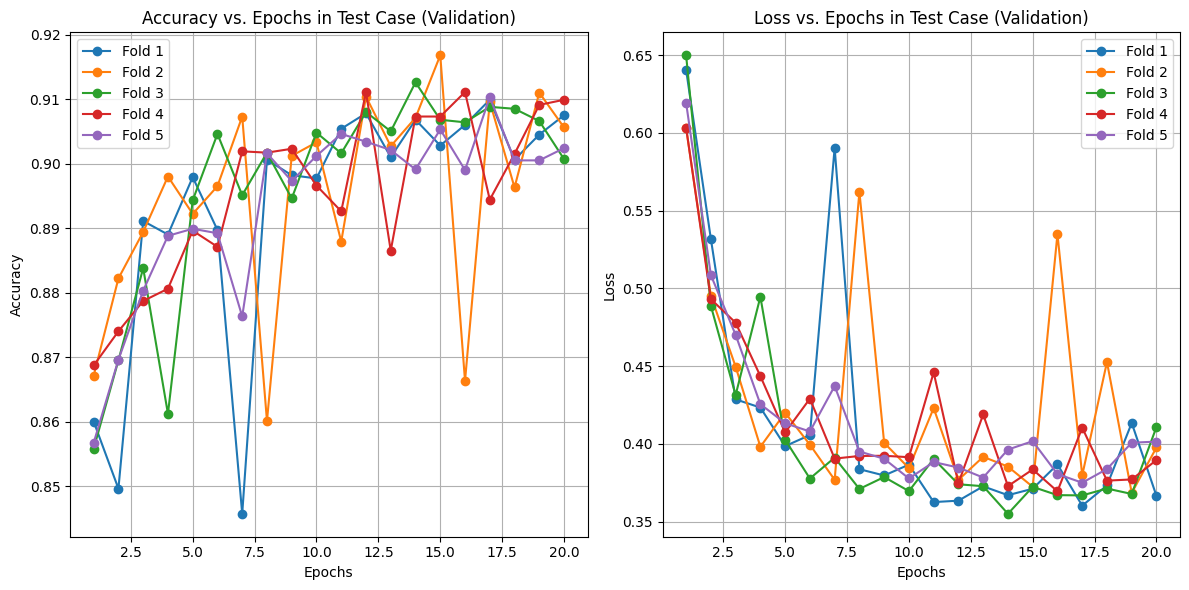

In [18]:
# Create subplots: 1 row, 2 columns (left: Accuracy, right: Loss)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Extract accuracy and loss per fold
for i, history in enumerate(histories):
    val_acc = history['val_accuracy']  # Validation accuracy
    val_loss = history['val_loss']  # Validation loss
    epochs = range(1, len(val_acc) + 1)  # X-axis (Epochs)

    # Plot Validation Accuracy
    axes[0].plot(epochs, val_acc, label=f"Fold {i+1}", marker='o')

    # Plot Validation Loss
    axes[1].plot(epochs, val_loss, label=f"Fold {i+1}", marker='o')

# Set Accuracy Plot Titles
axes[0].set_title("Accuracy vs. Epochs in Test Case (Validation)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True)

# Set Loss Plot Titles
axes[1].set_title("Loss vs. Epochs in Test Case (Validation)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()

Confusion matrix only for one of the train-test sets **(5 marks)**

---

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 800x600 with 0 Axes>

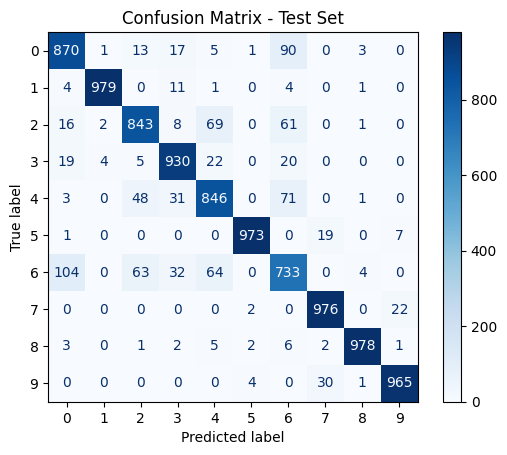

In [12]:
# Predict the class labels
# use the best model from the fold training
y_pred_probs = best_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix - Test Set")
plt.show()

Additional questions:


* Discussion about all tests made to get the final configuration of the architecture (e.g. epochs used). Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If no differences were found, what could be the reason? **(10 marks)**

##### K-Fold

| K | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| 3 | 0.9039 | 0.3958 | Faster training but Less stable results |
| 5 | **0.9067** | **0.3784** | highest accuracy with an accaptable loss |
| 10 | 0.9051 | 0.3721 | high accuracy but the cost of increased training time |

So, the best choice is 5 because it gives the highest accuracy and an accaptable loss and is computationally efficient.

##### epochs

| Epochs | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| 10 | 0.9071 | 0.3753 | accuracy is lower compared to longer training |
| 15 | 0.9093 | 0.3773 | 	Accuracy improves slightly, and loss remains stable |
| 20 | **0.9128** | **0.3798** | the highest accuracy and controlled loss. |
| 25 | 0.9083 | 0.4037 | Accuracy starts decreasing, and loss increases |
| 30 | 0.9106 | 0.4061 | Training longer does not significantly improve accuracy |


So, the best choice is 20 because it gives the highest accuracy and the controllable loss.

##### Batch Size

| Batch Size | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| 16 | **0.9151** | **0.3796** | Best accuracy with a small batch size, leading to more weight updates |
| 32 | 0.9101 | 0.3797 | Good balance of accuracy and stability, slightly less noisy than batch size 16. |
| 64 | 0.9082 | 0.3949 | Lower accuracy, but training is more stable with moderate batch size |
| 128 | 0.9067 | 0.4066 | Larger batch reduces noise but may generalize worse, leading to slightly higher loss. |
| 256 | 0.9028 | 0.4145 | Fewer updates per epoch, possibly leading to poor generalization and slightly lower accuracy. |

So, the best choice is 16 because it gives the highest accuracy and the lowest loss.


##### Kernel Size

| Kernel Size on 1st Layer | on 2nd Layer | Average Accuracy | Average Loss | Observations |
| - | - | - | - | - |
| 3x3 | 3x3 | **0.9099** | **0.3809** | second highest accuracy with lowest loss|
| 3x3 | 5x5 | **0.9109** | **0.3893** | highest accuracy but different from the second only 0,001 but the loss difference is about 0.0084 |
| 5x5 | 3x3 | 0.9059 | 0.4022 | Larger kernel in the first layer may lose fine details, reducing accuracy. |
| 5x5 | 5x5 | 0.9015 | 0.4105 | Worst performance; large kernels in both layers may reduce feature extraction efficiency. |

Even though 5x5 on the second layer has the highest accuracy, loss is slightly higher if compared with the 3x3 on the second layer with the same condition. So, the kernel size on the first layer and the kernel size on the second layer should be the same; 3x3 is balanced in accuracy and loss, especially loss, which is the lowest among experimentations.

##### N_HIDDEN

| N_HIDDEN | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| 64 | 0.9107 | 0.3245 | 2nd highest accuracy with lowest loss |
| 128 | **0.9112** | **0.3835** | highest accuracy, and an controlable loss |
| 256 | 0.9093 | 0.4771 | Loss increases, suggesting potential overfitting |
| 512 | 0.9080 | 0.5732 | Highest loss, likely overfitting, adding unnecessary complexity. |

So, the best choice is 128 because it gives best balance between accuracy and loss.

##### P_DROPOUT

| P_DROPOUT | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| 0.2 | 0.9083 | 0.4300 | Low dropout leads to potential overfitting, higher loss. |
| 0.3 | 0.9082 | 0.4231 | Still relatively high loss, model may be memorizing patterns. |
| 0.4 | 0.9053 | 0.4252 | Slight accuracy drop, similar loss to 0.3, minor generalization. |
| 0.5 | 0.9094 | 0.4056 | Good balance, regularization is working effectively. |
| 0.6 | **0.9097** | **0.3811** | Best accuracy so far, loss is well-controlled. |
| 0.7 | 0.9092 | 0.3766 | Slight loss improvement, but accuracy is stable. |

So, the best choice is 0.6 because it gives the best accuracy and a stable loss.

##### loss function

| Loss Function | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| sparse_categorical_crossentropy | **0.9115** | **0.3808** | Works with integer labels, saving memory. Achieves slightly higher accuracy and lower loss, making it the better choice. |
| categorical_crossentropy | 0.9099 | 0.3840 | Requires one-hot encoding, increasing memory usage. Slightly lower accuracy and slightly higher loss. |

So, the best choice is sparse_categorical_crossentropy because it uses integer labels and gives the best accuracy and an lowest loss.

##### With vs. Without Batch Normalization

| With Batch Normalization | Average Accuracy | Average Loss | Observations |
| - | - | - | - |
| No | 0.9097 | 0.3881 | Training is slightly slower, and loss is higher. Model may converge more slowly and be more sensitive to weight initialization. |
| Yes | **0.9115** | **0.3808** | Improves training stability, helps prevent overfitting, and leads to slightly better accuracy and lower loss. |

So, the best choice is having a batch normalization because it significantly improves the training speed and reduces the risk of overfitting.

* Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

After testing a few variables, the best option following the experiments is on the below
- k of k-fold: 5
- the number of epochs: 20 epochs
- batch size: 16
- number of neurons in the hidden layer: 128
- dropout probability: 0.6
- loss function: sparse_categorical_crossentropy
- batch normalization enable: having BatchNormalization in each layer
- kernel size: 3*3 for every layer

The best accuracy getting from this scheme is 0.9115, and the loss is 0.3808.

For the ideas to improve these accuracy and performance,

There are many variations tha should be tried and might get the higher accuracy that the current model such as:

1. Regularization Methods: exploring more about the impact of L1, L2, L1L2 with different parameter values

2. Data Augmentation: applying the method like random rotations, zoom, shifts, and flips. They can make more varity in the. dataset

3. Optimizers: other optimizers like AdamW (Adam with weight decay) or SGD with momentum could be tested to see their effect on convergence speed and accuracy

4. Activation Function Tuning: Different activation functions (ReLU, Leaky ReLU, ELU, Swish) might impact network performance which may improve in accuracy or convergence speed.

Overall, the accuracy and loss of current model now is impressing, but there are many experiments that have not done in this experiments. So, it the list abrove is just the frement that should be try

---
